In [72]:
import nbsetup
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from helpers.ergodic import ErgodicEnsemble

In [15]:
def gen_data(n, p):
    G = nx.generators.random_graphs.erdos_renyi_graph(n, p)
    return nx.is_connected(G)

In [126]:
def calc_ee(n, p, e):
    observations = np.array([[gen_data(n, p)] for i in range(e)], dtype='uint8')
    bins = [0,1,2]
    ee = ErgodicEnsemble(observations, bins)
    return ee.ergodic - ee.ensemble

def plot_single(n, e, m, log=False):
    x, y = [], []
    
    # if log scale, adjust x axis plots
    if log:
        ps = np.geomspace(m**-2, 1.0, m+1)
    else:
        ps = np.linspace(0.0, 1.0, m+1)
    
    # run all calcs
    for p in ps:
        nbsetup.cp(p)
        x.append(p)
        y.append(calc_ee(n, p, e))
    
    # plot results
    h = sns.lineplot(x=x, y=y)
    h.set_xlabel("Probability of connection")
    h.set_ylabel("Complexity")
    h.set_title("Complexity of Erdos Renyi graphs with %s nodes over and %s ensembles" % (n, e))
    if log:
        h.set(xscale='log')
    
    # plot the critical line
    plt.axvline(x=np.log(n)/n, color='r')

1.0


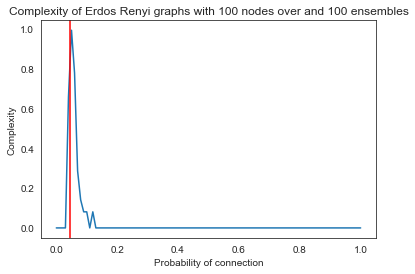

In [129]:
plot_single(100, 100, 100)

1.0


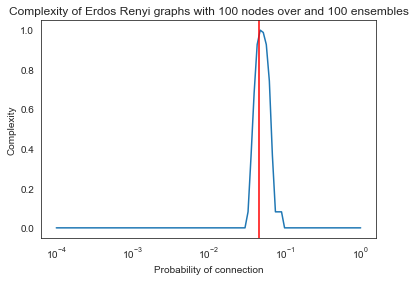

In [131]:
plot_single(100, 100, 100, True)

1.0


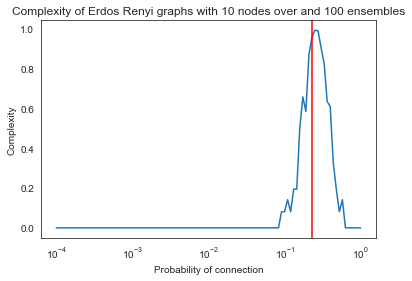

In [132]:
plot_single(10, 100, 100, True)

1.0


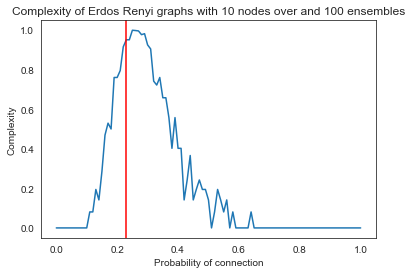

In [133]:
plot_single(10, 100, 100)

1.0


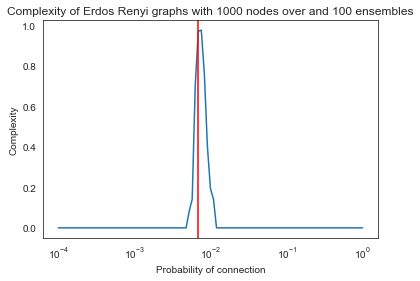

In [134]:
plot_single(1000, 100, 100, True)